# Cost Function

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

Problem Statement
You would like a model which can predict housing prices given the size of the house.
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for $300,000 and a house with 2000 square feet sold for $500,000.

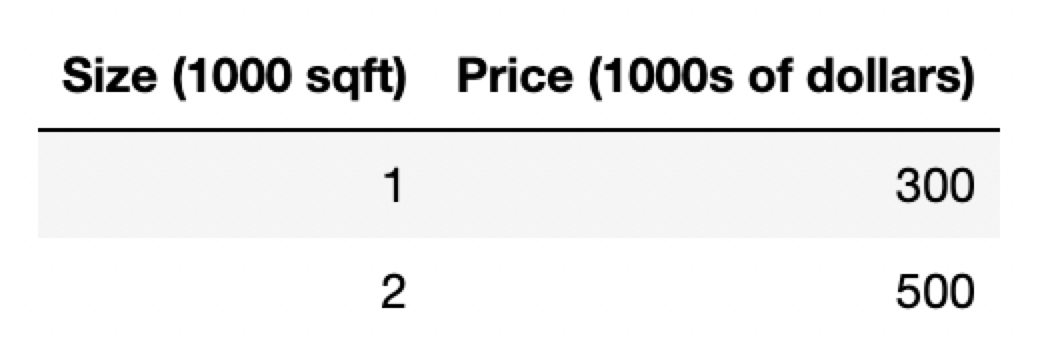


In [2]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

The code below calculates cost by looping over each example. In each loop:

f_wb, a prediction is calculated
the difference between the target and the prediction is calculated and squared.
this is added to the total cost.

In [3]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [4]:
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

Convex Cost surface
The fact that the cost function squares the loss ensures that the 'error surface' is convex like a soup bowl. It will always have a minimum that can be reached by following the gradient in all dimensions. In the previous plot, because the  𝑤
  and  𝑏
  dimensions scale differently, this is not easy to recognize. The following plot, where  𝑤
  and  𝑏
  are symmetric, was shown in lecture:

In [5]:
soup_bowl()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Gradient Descent for Linear Regression

In [6]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

Problem Statement
Let's use the same two data points as before - a house with 1000 square feet sold for $300,000 and a house with 2000 square feet sold for $500,000.
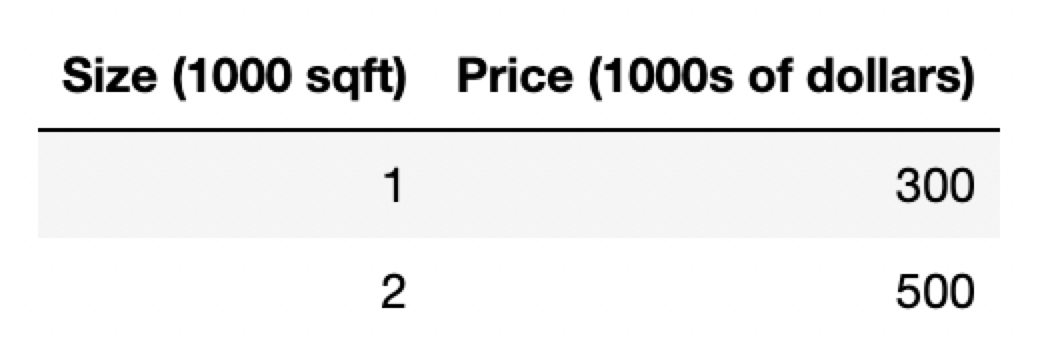

You will implement gradient descent algorithm for one feature. You will need three functions.

compute_gradient implementing equation (4) and (5) above
compute_cost implementing equation (2) above (code from previous lab)
gradient_descent, utilizing compute_gradient and compute_cost
Conventions:

The naming of python variables containing partial derivatives follows this pattern, ∂𝐽(𝑤,𝑏)∂𝑏
  will be dj_db.
w.r.t is With Respect To, as in partial derivative of  𝐽(𝑤𝑏)
  With Respect To  𝑏
 .

In [7]:
import numpy as np

# Compute cost function for linear regression
def compute_cost(x, y, w, b):
    m = x.shape[0]
    predictions = x.dot(w) + b
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Compute gradient function for linear regression
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    predictions = x.dot(w) + b
    error = predictions - y
    dj_dw = (1 / m) * (x.T.dot(error))
    dj_db = (1 / m) * np.sum(error)
    return dj_dw, dj_db

# Gradient descent function
def gradient_descent(x, y, w_init, b_init, alpha, num_iters, compute_cost, compute_gradient):
    w = w_init
    b = b_init
    J_hist = []
    p_hist = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 100 == 0:
            J_hist.append(compute_cost(x, y, w, b))
            p_hist.append((w, b))

    return w, b, J_hist, p_hist

# Example usage
# Ensure x_train is a 2D array
if x_train.ndim == 1:
    x_train = x_train.reshape(-1, 1)

# Initialize parameters
w_init = np.zeros(x_train.shape[1])
b_init = 0
iterations = 10000
alpha = 1.0e-2

# Run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

# Plot cost versus iteration
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[10:])), J_hist[10:])
ax1.set_title("Cost vs. iteration (start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()


(w,b) found by gradient descent: ([199.99285075],100.011567727362)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Above, the contour plot shows the  𝑐𝑜𝑠𝑡(𝑤,𝑏)
  over a range of  𝑤
  and  𝑏
 . Cost levels are represented by the rings. Overlayed, using red arrows, is the path of gradient descent. Here are some things to note:

The path makes steady (monotonic) progress toward its goal.
initial steps are much larger than the steps near the goal.

The distance between the steps shrinks as it approaches to zero. 

In [9]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Compute cost function for linear regression
def compute_cost(x, y, w, b):
    m = x.shape[0]
    predictions = x.dot(w) + b
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Compute gradient function for linear regression
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    predictions = x.dot(w) + b
    error = predictions - y
    dj_dw = (1 / m) * (x.T.dot(error))
    dj_db = (1 / m) * np.sum(error)
    return dj_dw, dj_db

# Gradient descent function
def gradient_descent(x, y, w_init, b_init, alpha, num_iters, compute_cost, compute_gradient):
    w = np.array([w_init]) if np.isscalar(w_init) else w_init
    b = b_init
    J_hist = []
    p_hist = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 1 == 0:  # Adjusted to record every iteration for better visibility in low iteration counts
            J_hist.append(compute_cost(x, y, w, b))
            p_hist.append((w, b))

    return w, b, J_hist, p_hist

# Example usage
# Ensure x_train is a 2D array
if x_train.ndim == 1:
    x_train = x_train.reshape(-1, 1)

# Initialize parameters
w_init = np.zeros(x_train.shape[1])
b_init = 0
iterations = 10
alpha = 8.0e-1

# Run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

# Plot the parameter history to visualize divergence
def plt_divergence(p_hist, J_hist, x_train, y_train):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8), constrained_layout=True)

    w_hist, b_hist = zip(*p_hist)
    iterations = list(range(len(p_hist)))

    ax[0].plot(iterations, w_hist, label='w')
    ax[0].plot(iterations, b_hist, label='b')
    ax[0].set_ylabel('Parameter values')
    ax[0].set_xlabel('Iteration')
    ax[0].legend()

    ax[1].plot(iterations, J_hist, label='Cost')
    ax[1].set_ylabel('Cost')
    ax[1].set_xlabel('Iteration')
    ax[1].legend()

    plt.show()

# Visualize the divergence
plt_divergence(p_hist, J_hist, x_train, y_train)


(w,b) found by gradient descent: ([-48453.65133312],-29956.671528960018)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

The left graph shows  𝑤's progression over the first few steps of gradient descent. 𝑤 oscillates from positive to negative and cost grows rapidly. Gradient Descent is operating on both  𝑤 and  𝑏 simultaneously. 

# Multiple Variable Linear Regression


You will use the motivating example of housing price prediction. The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below. Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!
You will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.


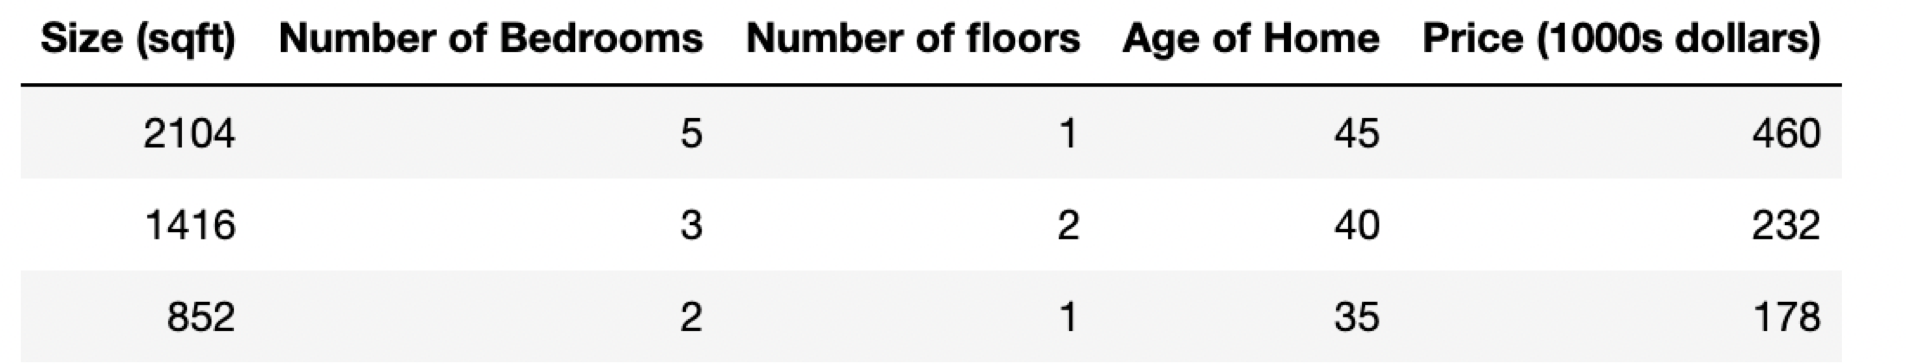

In [11]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [12]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


In [13]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [14]:
#Single Prediction element by element
def predict_single_loop(x, w, b): 
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b                
    return p
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


In [15]:
#Single Prediction, vector
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p    
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.99999761940825


In [16]:
#Compute Cost With Multiple Variables
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904880036537e-12


In [17]:
#Compute Gradient with Multiple Variables¶
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.673925169143331e-06
dj_dw at initial w,b: 
 [-2.72623581e-03 -6.27197272e-06 -2.21745580e-06 -6.92403399e-05]


In [18]:
#Gradient Descent With Multiple Variables
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

    
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

Iteration    0: Cost  2529.46   
Iteration  100: Cost   695.99   
Iteration  200: Cost   694.92   
Iteration  300: Cost   693.86   
Iteration  400: Cost   692.81   
Iteration  500: Cost   691.77   
Iteration  600: Cost   690.73   
Iteration  700: Cost   689.71   
Iteration  800: Cost   688.70   
Iteration  900: Cost   687.69   
b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …